<a href="https://colab.research.google.com/github/KeerthiMettu/Rides-Data-Analysis/blob/main/Bikesharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I worked as a Software developer in a UK based project called “Smart Bike System” for 2 years. It is a bike rental system in which, customers use the government-aided bicycle rental services throughout the year. Being a backend developer and a bug fixer, I used to undertake different problems faced in both software and hardware related software issues from different customers and front end assistance teams. I was always curious to know about the scale of my entire project, its statistics in revenue and their business operating level in stabilised cities. The scope of this project always used to baffle me with some endless software upgrades. This is a pivotal reason to go in search of any bike rental platform real data. In that quest, I desisted myself with a ‘Bike Sharing’ dataset from Kaggle.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The bike-sharing dataset is a piece of real-time information collected and published in an article by [Fanee, 2013]. The dataset is downloaded from the Kaggle website through  URL: https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset. It contains a CSV file, which is uploaded to the personal drive location so that the dataset can be imported and mounted to the colab working directory.

In [ ]:
# converting the dataset into a data frame format for priliminary data analysis

ridesdata=pd.read_csv("drive/My Drive/Data Science/bike-sharing-dataset/day.csv")

In [ ]:
print("Number of instances in the day wise rides file: ",ridesdata.shape[0])
print("Number of features in the day wise rides file: ",ridesdata.shape[1])

Number of instances in the day wise rides file:  731
Number of features in the day wise rides file:  16


In [ ]:
ridesdata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
ridesdata.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
ridesdata.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

**More information about these features is described in the dataset available location in Kaggle as the following:**

instant: record index

dteday : date

season : season (1:springer, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

holiday : weather day is holiday or not 

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

In [ ]:
#renaming the features for better understanding

ridesdata.rename(columns={'instant':'Id',
                        'dteday':'Datetime',
                        'yr':'year',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'Weather_condition',
                        'hum':'Humidity',
                        'mnth':'Month',
                        'casual':'casual_users_rides',
                        'registered':'registered_users_rides',
                        'cnt':'rides_count'},inplace=True)

**Justification for features removal:**

1. Temp and atemp features are both holding the normalized temperature in Celcius with a different minimum and maximum range values on an hourly scale. As both of them are representing the same data, eliminating the second feature i.e., atemp.

2.Datetime feature data is explicitly described as other features like a month, year, weekday, is_holiday, is_workingday and season. So this object data feature is never user in the further analysis process and hence eliminating it.

In [ ]:
del ridesdata['Datetime']
del ridesdata['atemp']

In [ ]:
ridesdata.describe()

,Id,season,year,Month,is_holiday,weekday,is_workingday,Weather_condition,temp,Humidity,windspeed,casual_users_rides,registered_users_rides,rides_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
ridesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
Id                        731 non-null int64
season                    731 non-null int64
year                      731 non-null int64
Month                     731 non-null int64
is_holiday                731 non-null int64
weekday                   731 non-null int64
is_workingday             731 non-null int64
Weather_condition         731 non-null int64
temp                      731 non-null float64
Humidity                  731 non-null float64
windspeed                 731 non-null float64
casual_users_rides        731 non-null int64
registered_users_rides    731 non-null int64
rides_count               731 non-null int64
dtypes: float64(3), int64(11)
memory usage: 80.0 KB


In [ ]:
print(ridesdata.size)
print(ridesdata.shape)
print(ridesdata.ndim)

10234
(731, 14)
2


The features like the year, is_holiday, is_workingday have only the values 0 or 1. So instead of being a numeric feature, they can be converted into categorical form to make it more significant. Therefore, converting them into categorical features and replacing 0 and 1 with appropriate values.

In [ ]:
years=pd.Categorical(ridesdata['year'])

In [ ]:
years=years.rename_categories(["2011","2012"])

In [ ]:
print(years.describe())

# ridesdata['year']=years

            counts     freqs
categories                  
2011           365  0.499316
2012           366  0.500684


In [ ]:
#similarly modifying likewise features

is_holiday=pd.Categorical(ridesdata['is_holiday'])

is_holiday=is_holiday.rename_categories(["no","yes"])

print(is_holiday.describe())

# ridesdata['is_holiday']=is_holiday

            counts     freqs
categories                  
no             710  0.971272
yes             21  0.028728


In [ ]:
is_workingday=pd.Categorical(ridesdata['is_workingday'])
is_workingday=is_workingday.rename_categories(["no","yes"])

print(is_workingday.describe())

# ridesdata['is_workingday']=is_workingday

            counts     freqs
categories                  
no             231  0.316005
yes            500  0.683995


In [ ]:
seasons=pd.Categorical(ridesdata['season'])

#renaming categories based on the dates present in the Datetime feature

seasons=seasons.rename_categories(["winter","spring","summer","fall"])

seasons.describe()

,counts,freqs
categories,,
winter,181,0.247606
spring,184,0.251710
summer,188,0.257182
fall,178,0.243502


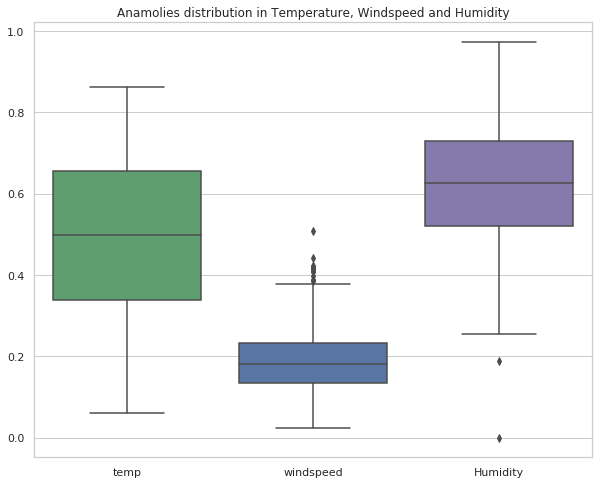

In [ ]:
#checking for any anamolies in the normalized data features (temperature, windspeed 
#and Humidity) through box plot

fig=plt.subplots(figsize=(10,8))
colors={"temp": "g", "windspeed": "b", "Humidity":"m"}
sns.boxplot(data=ridesdata[['temp','windspeed','Humidity']],palette=colors)
plt.title('Anamolies distribution in Temperature, Windspeed and Humidity')
plt.show()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

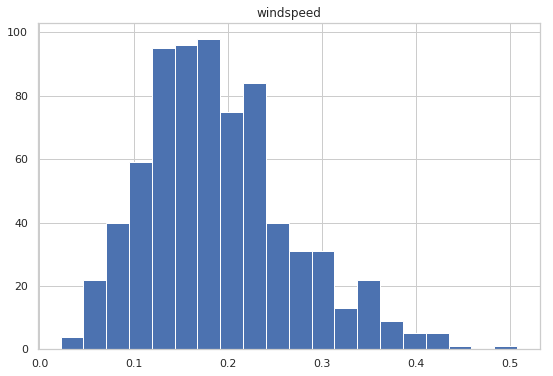

In [ ]:
ridesdata.hist(column="windspeed",figsize=(9,6),bins=20)

ridesdata['windspeed'].describe()

In [ ]:
#replacing all the outlier values (>0.35) with the median value of windspeed

median_windspeed= ridesdata.loc[ridesdata['windspeed']<0.35, 'windspeed'].median()

In [ ]:
ridesdata.loc[ridesdata.windspeed > 0.35, 'windspeed'] = np.nan

In [ ]:
ridesdata.fillna(median_windspeed,inplace=True)

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: Humidity, dtype: float64

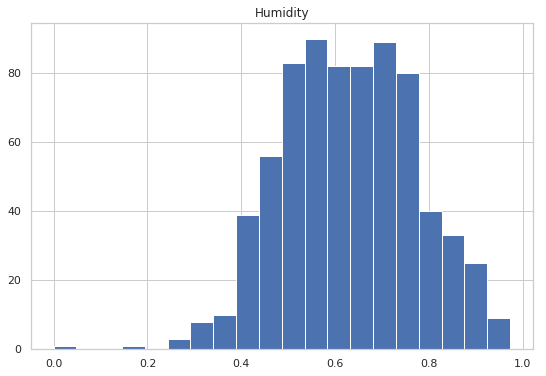

In [ ]:
#similarly modifying the anamolies in Humidity feature with its median values

ridesdata.hist(column="Humidity",figsize=(9,6),bins=20)

ridesdata['Humidity'].describe()

In [ ]:
#replacing all the outlier values (<0.2) with the median value

median_humidity= ridesdata.loc[ridesdata['Humidity']>0.2, 'Humidity'].median()

In [ ]:
ridesdata.loc[ridesdata.Humidity <0.2, 'Humidity'] = np.nan

In [ ]:
ridesdata.fillna(median_humidity,inplace=True)

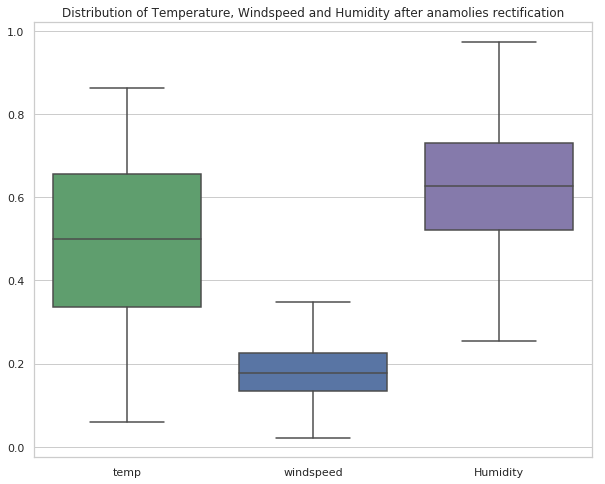

In [ ]:
fig=plt.subplots(figsize=(10,8))
colors={"temp": "g", "windspeed": "b", "Humidity":"m"}
sns.boxplot(data=ridesdata[['temp','windspeed','Humidity']],palette=colors)
plt.title('Distribution of Temperature, Windspeed and Humidity after anamolies rectification')
plt.show()

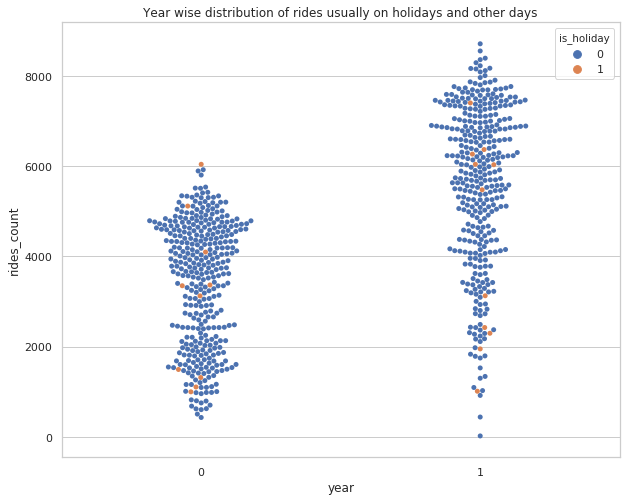

In [ ]:
#comparing the bike rides yearly and the influence of holidays in a most rides count day.

plt.subplots(figsize=(10,8))
sns.set(style="whitegrid")
sns.swarmplot(x='year',y='rides_count',hue=ridesdata['is_holiday'],
              data=ridesdata[['year','rides_count']])
plt.title('Year wise distribution of rides usually on holidays and other days')
plt.show()

In [ ]:
#finding the rides distribution for each month

months=list(ridesdata.Month.unique())

In [ ]:
ridecount=[]

# finding each month's total rides count
for i in months:
    x = ridesdata[ridesdata.Month == i]
    ridecount.append(sum(x["rides_count"]))

In [ ]:
#new data frame to hold rides count corresponding to each month

ridescount_month = pd.DataFrame({"Month":months, "Rides_count":ridecount})

ridescount_month

,Month,Rides_count
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


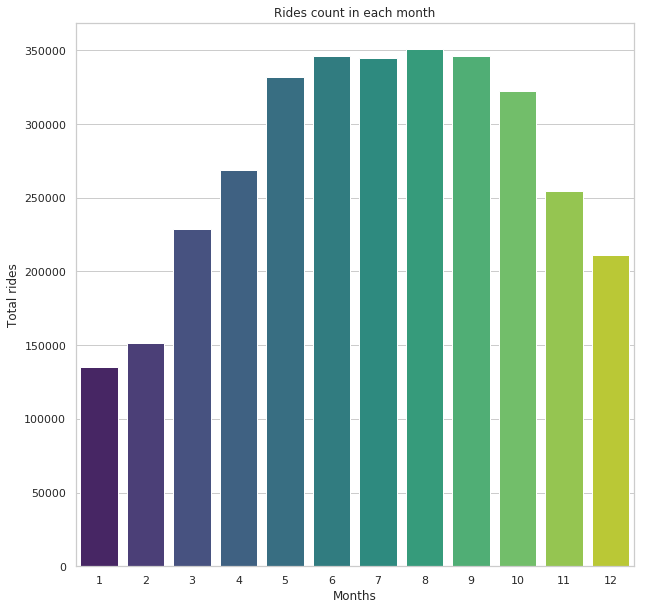

In [ ]:
#plotting the bar chart of the rides count in their respective Month


plt.figure(figsize=(10,10))
sns.barplot(x="Month", y="Rides_count", data=ridescount_month,
            palette="viridis")
plt.xlabel("Months")
plt.ylabel("Total rides")
plt.title("Rides count in each month")
plt.show()

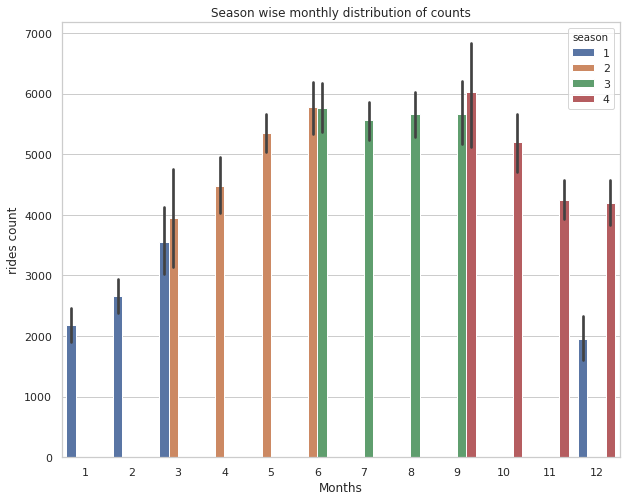

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Month',y='rides_count',
            data=ridesdata[['Month','rides_count','season']],hue='season')
plt.xlabel("Months")
plt.ylabel("rides count")
plt.title('Season wise monthly distribution of counts')
plt.show()

In [ ]:
#storing this scrubbed data frame into a csv for further analysis.

ridesdata.to_csv('ridesdata.csv', sep=',', index=False)

**Observations:**

The list of interpretations that are derived from the sequence of steps that are trailed after the initial scrubbing process of the data as mentioned below. They are:
1. The Temperature, Humidity and Windspeed are the normalised features, which have a different range of distribution values between 0 and 1. The rides count is a feature that is purely dependent on multiple factors like the weather situation of that day, day type (weekday or weekend) and holidays.
2. The Swarn plot of bike rides against the annual year 2010 and 2011, it is seen that there are more rides generated in the succeeding year, than in the previous year. It is also identified that being a holiday has an uneven distribution spread in the total rides count, which means that there is an equal probability of any day to experience a huge number of rides.
3. The first bar plot shows the total rides spread for each month for both the years. August month has the highest number of rides than any other months and January is the only month with the least number of rides. June and September months have almost an equal number of rides.
4. The second bar plot is a similar comparison plot that represents the Seasons vs the rides count. These bars illustrate the seasonal division of rides and clearly states that Summer is a full time best rides throughout the season as it has recorded the highest number of rides when compared with any other season months. And winter is the least preferred season for this bike rental services.
5. The most common thing in the rides distribution of both the bar graphs follows an upward trend at the beginning of the year and a downward trend in the ending of the year.

**Conclusion:**

It is well defined that the seasons i.e., the atmosphere and weather condition of the day determines the rides count of any day in a year. So the trend followed by the bike rides frequency in this region follows a normal distribution within a year. Hence, given this type of region with similar climatic conditions, it is possible to predict the regularity in bike rides and their frequencies. It is most likely to choose the regression model ending path in selecting an algorithm for forecasting the bike ride counts.

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.